In [1]:
import numpy as np
pi = np.pi

from qutip import *
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import gate_sequence_product, rx, csign
from qutip.qip.device import *
from qutip.qip import pulse

#print(qutip.qip.device.__file__)
import qip.ethprocessor as qip
from qip.ethprocessor import ETHProcessor
%load_ext autoreload
%autoreload 2

# One qubit test

## Create a Quantum Circuit

In [2]:
# Number of qubits in the system
N = 1

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
#qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
#qc.add_gate("RX", 0, None, np.pi/3, r"\pi/3")

#qc.png

### ETH Processor

In [3]:
eth = ETHProcessor()
tlist, coeffs = eth.load_circuit(qc)

### Plot pulses

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16e6acb83a0>)

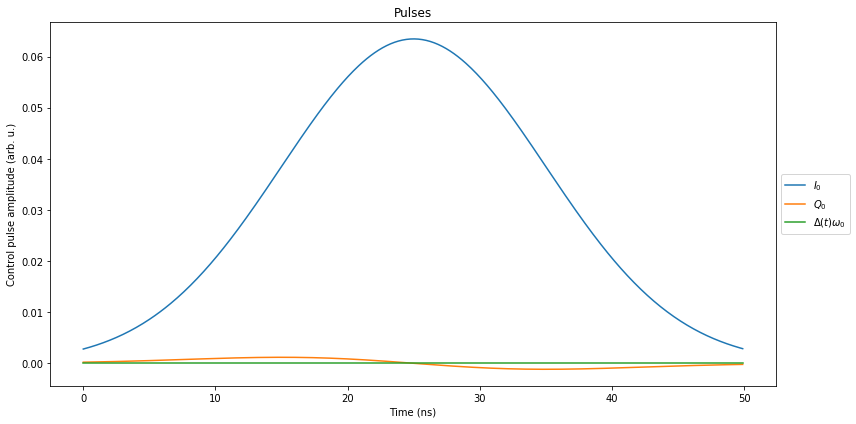

In [4]:
eth.plot_pulses(title='Pulses')

## Execute quantum circuit

In [5]:
result = eth.run_state(init_state = basis(3,0), analytical = False)
final_state = result.states[-1]

### Transform to the transmon frame

In [6]:
H_drift = eth.drift.drift_hamiltonians[0].qobj # Qubit Hamiltonian
t_total = max(tlist)
U_rot = (1j*H_drift*t_total).expm()
transmon_state = U_rot * final_state

In [7]:
# project onto qubit subspace
qubit_state = Qobj(transmon_state.data[0:2], dims = [[2],[1]])

# normalize qubit state
qubit_state_norm = qubit_state

# target state
target_state = rx(pi)*basis(2,0)

# fidelity
fid = fidelity(target_state, qubit_state_norm)
print('Fidelity = %s %%' % round(fid*100,4)) # Should be close to 100 %

Fidelity = 99.9995 %


# Two qubit test

## Quantum Circuit

In [16]:
# Number of qubits in the system
N = 2

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 1, None, np.pi, r"\pi")
#qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
#qc.png

### ETH Processor

In [17]:
from qip.ethprocessor import ETHProcessor
eth = ETHProcessor()
tlist, coeffs = eth.load_circuit(qc)

### Plot pulses

(<Figure size 864x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x16e6ada2d60>)

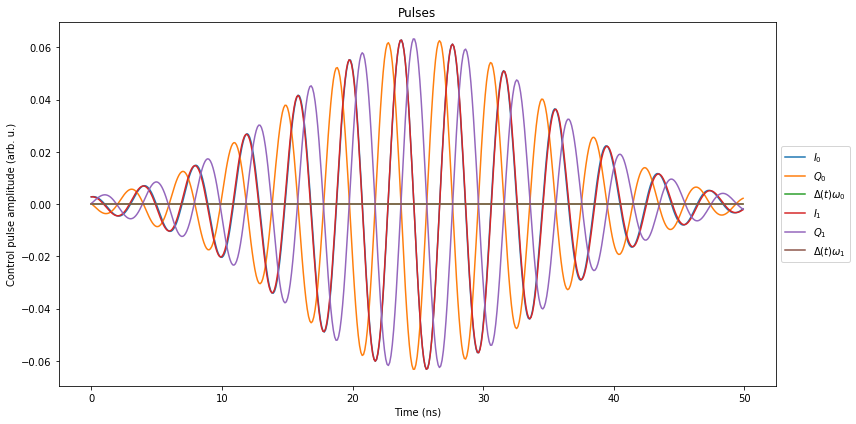

In [18]:
eth.plot_pulses(title='Pulses')

## Run state

In [19]:
psi = tensor(basis(3,0),basis(3,0)) # vacuum
result = eth.run_state(init_state = psi, analytical = False)
final_state = result.states[-1]

### Transform to the transmon frame

In [20]:
H_drift = eth.drift.drift_hamiltonians[0].qobj # Qubit Hamiltonian
t_total = tlist[-1]
U_rot = (1j*H_drift*t_total).expm()
transmon_state = U_rot * final_state

In [22]:
# project onto qubit subspace
qubit_state = (tensor(basis(2,0),basis(2,0))*tensor(basis(3,0),basis(3,0)).dag() \
               + tensor(basis(2,1),basis(2,1))*tensor(basis(3,1),basis(3,1)).dag() \
               + tensor(basis(2,0),basis(2,1))*tensor(basis(3,0),basis(3,1)).dag() \
               + tensor(basis(2,1),basis(2,0))*tensor(basis(3,1),basis(3,0)).dag()) * transmon_state

# target state
target_state = tensor(rx(np.pi), rx(np.pi)) * tensor(basis(2,0),basis(2,0))

print(target_state)

# fidelity
fid = fidelity(qubit_state,target_state)
print('Fidelity = %s %%' % round(fid*100,4)) # Should be close to 100 %

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.]
 [ 0.]
 [ 0.]
 [-1.]]
Fidelity = 99.9979 %


In [14]:
qubit_state

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 2.88486325e-05+8.07992163e-06j]
 [ 1.39346101e-03-2.89648458e-03j]
 [ 1.41016205e-03-2.57093376e-03j]
 [-9.96415121e-01+8.44174497e-02j]]

## CZ gate

In [15]:
# Number of qubits in the system
N = 2

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)
qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("CSIGN", controls=0, targets=1)
qc.png

FileNotFoundError: [Errno 2] No such file or directory: 'qcirc.png'

In [ ]:
from qip.ethprocessor import ETHProcessor
eth = ETHProcessor()
tlist, coeffs = eth.load_circuit(qc)

In [ ]:
len(tlist)

In [ ]:
eth.plot_pulses(title='Pulses')

In [ ]:
psi = tensor(basis(3,1),basis(3,1)) # vacuum
result = eth.run_state(init_state = psi, analytical=False)
final_state = result.states[-1]

In [ ]:
final_state